In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
class MultiArmBandits:
  def __init__(self,k_arms,epsilon=0.1,steps=1000):
    self.k_arms = k_arms
    self.epsilon = epsilon
    self.steps = steps
    self.q_true = np.random.randn(k_arms)
    self.q_estimates = np.zeros(k_arms)
    self.action_counts = np.zeros(k_arms)
    print(self.q_true,self.q_estimates)
  def action_selection(self):
    if np.random.rand() < self.epsilon:
      return np.random.randint(self.k_arms)
    else:
      return np.argmax(self.q_estimates)

  def step(self,action):
    return self.q_true[action]

  def train(self):
    rewards = []
    for _ in range(self.steps):
      action = self.action_selection()
      print("Action : ", action)
      reward = self.step(action)
      print("Reward : ", reward)
      self.action_counts[action] += 1
      print("No of actions : " , self.action_counts)
      self.q_estimates[action] += (reward - self.q_estimates[action])/self.action_counts[action]
      print("Estimates : " , self.q_estimates)
      rewards.append(reward)
      print("-"*100)
    return rewards

In [35]:
bandit = MultiArmBandits(k_arms = 5,epsilon = 0.2,steps = 100)
rewards = bandit.train()

[-0.02988987  0.90266167 -1.37109695 -0.30625386  0.80723047] [0. 0. 0. 0. 0.]
Action :  0
Reward :  -0.02988987326503041
Reward :  -0.02988987326503041
No of actions :  [1. 0. 0. 0. 0.]
Estimates :  [-0.02988987  0.          0.          0.          0.        ]
----------------------------------------------------------------------------------------------------
Action :  1
Reward :  0.9026616708680952
Reward :  0.9026616708680952
No of actions :  [1. 1. 0. 0. 0.]
Estimates :  [-0.02988987  0.90266167  0.          0.          0.        ]
----------------------------------------------------------------------------------------------------
Action :  1
Reward :  0.9026616708680952
Reward :  0.9026616708680952
No of actions :  [1. 2. 0. 0. 0.]
Estimates :  [-0.02988987  0.90266167  0.          0.          0.        ]
----------------------------------------------------------------------------------------------------
Action :  1
Reward :  0.9026616708680952
Reward :  0.9026616708680952
No of a

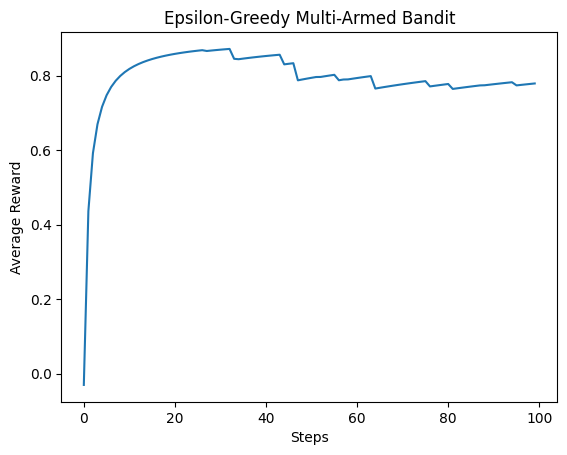

In [36]:
plt.plot(np.cumsum(rewards) / (np.arange(1, len(rewards) + 1)))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Multi-Armed Bandit")
plt.show()